<a href="https://colab.research.google.com/github/swathise/swathise/blob/main/EW30050_1b_and_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
KNN Predictions: [1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0

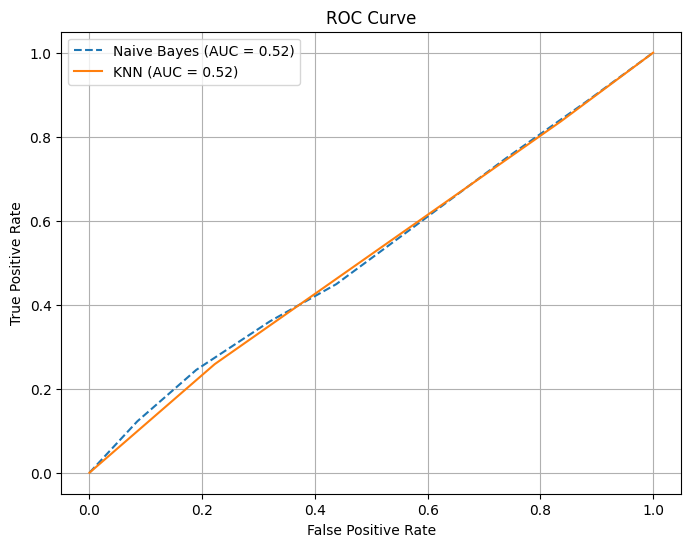

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Load data
hamspam_df = pd.read_csv('/hamspam.csv.csv')
roc_df = pd.read_csv('/roc_data.csv')

# Preprocess data (convert categorical to numerical for Naive Bayes & KNN)
def preprocess_data(df):
    df['Contains Link'] = df['Contains Link'].map({'Yes': 1, 'No': 0})
    df['Contains Money Words'] = df['Contains Money Words'].map({'Yes': 1, 'No': 0})
    df['Length'] = df['Length'].map({'Long': 1, 'Short': 0})
    df['Class'] = df['Class'].map({'Spam': 1, 'Ham': 0})
    return df

hamspam_df = preprocess_data(hamspam_df)
X = hamspam_df[['Contains Link', 'Contains Money Words', 'Length']]
y = hamspam_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Task 1b: Train Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Output predictions
print("Naive Bayes Predictions:", y_pred_nb)
print("KNN Predictions:", y_pred_knn)

# Task 2b: Compute ROC and AUC
nb_probs = nb.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]

# Compute ROC for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
auc_nb = auc(fpr_nb, tpr_nb)

# Compute ROC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', linestyle='--')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

